# Group 10 - Campus Recruitment
### Kiran Kumar A - CB.EN.U4CSE18430
### Krishna Sharma S - CB.EN.U4CSE18434
### B Shri Hari Prajapathi - CB.EN.U4CSE471

## Importing Libraries and uploading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Preprocessing and Visualization

In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There are null values only in the 'salary' column , we are dropping that column. Since it is not required to predict if a candidate gets placed or not which is our aim.

In [ ]:
df.drop(['salary'], axis=1, inplace=True)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [ ]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [ ]:
categorical_feat = df.select_dtypes(include=['object'])
categorical_feat = categorical_feat.drop('status',1)

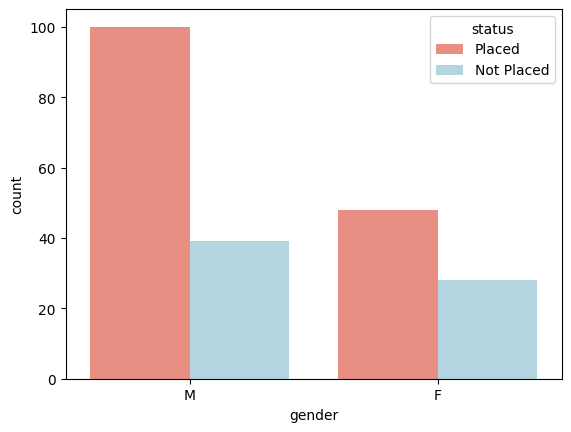

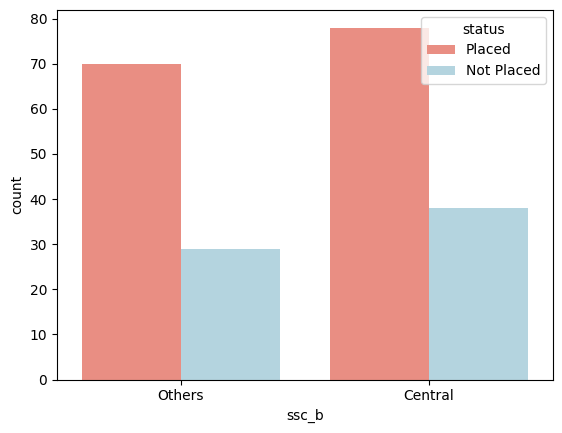

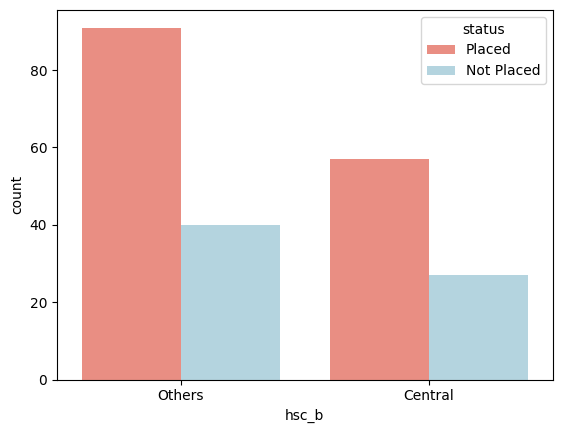

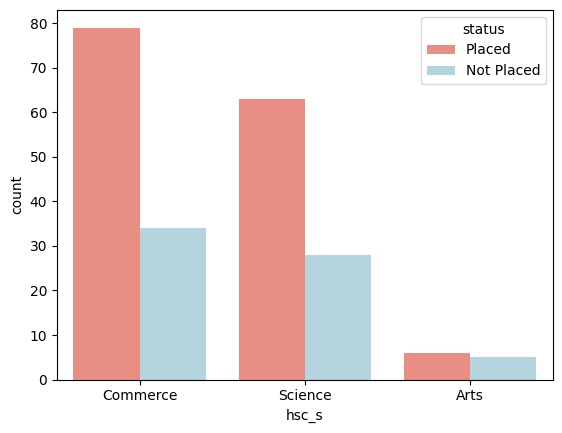

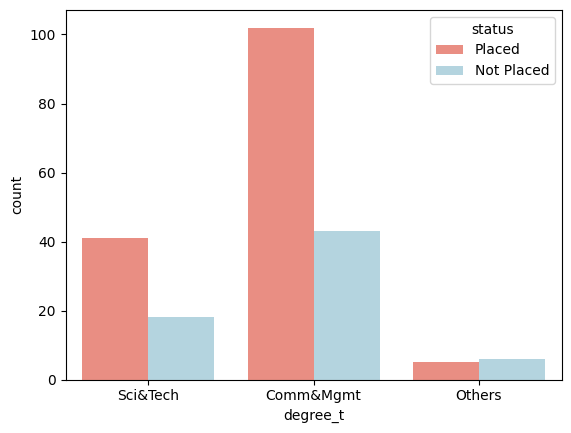

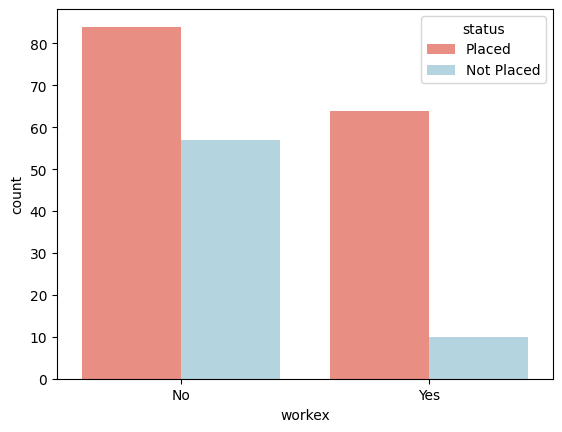

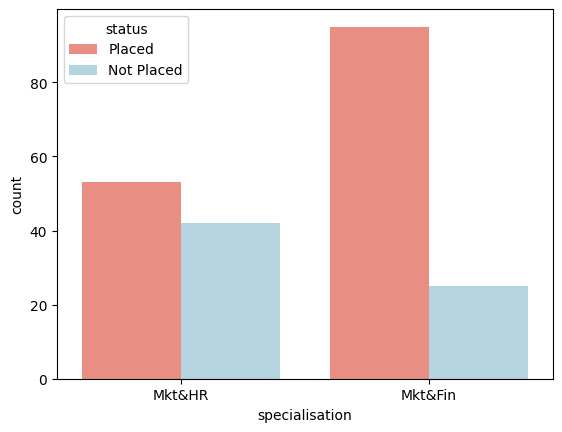

In [ ]:
import seaborn as sns
for col in categorical_feat:
    sns.countplot(x = categorical_feat[col], hue=df['status'], palette =['salmon','lightblue'])
    plt.show()

<ul>
<li> We see that most men got placed.
<li> Most people who had prior work experience got placed.
<li> Most students in Commerce & Management got placed
</ul>

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [ ]:
cleanup_nums = {"workex":     {"Yes": 1, "No": 0},
                "status":     {"Placed": 1, "Not Placed": 0},
                "hsc_b" :     {"Central": 1, "Others": 0},
                "ssc_b" :     {"Central": 1, "Others": 0},
                "gender":     {"F": 1, "M": 0}
               }
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,0,0,0,Commerce,Sci&Tech,0,Mkt&HR,1
1,0,1,0,Science,Sci&Tech,1,Mkt&Fin,1
2,0,1,1,Arts,Comm&Mgmt,0,Mkt&Fin,1
3,0,1,1,Science,Sci&Tech,0,Mkt&HR,0
4,0,1,1,Commerce,Comm&Mgmt,0,Mkt&Fin,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["specialisation"]])

k = pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
obj_df.drop(['specialisation'], axis=1, inplace=True)
obj_df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,status
0,0,0,0,Commerce,Sci&Tech,0,1
1,0,1,0,Science,Sci&Tech,1,1
2,0,1,1,Arts,Comm&Mgmt,0,1
3,0,1,1,Science,Sci&Tech,0,0
4,0,1,1,Commerce,Comm&Mgmt,0,1


In [ ]:
k.columns=['Mkt&Fin','Mkt&HR']
obj_df=obj_df.join(k)
obj_df.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,status,Mkt&Fin,Mkt&HR
0,0,0,0,Commerce,Sci&Tech,0,1,0.0,1.0
1,0,1,0,Science,Sci&Tech,1,1,1.0,0.0
2,0,1,1,Arts,Comm&Mgmt,0,1,1.0,0.0
3,0,1,1,Science,Sci&Tech,0,0,0.0,1.0
4,0,1,1,Commerce,Comm&Mgmt,0,1,1.0,0.0


In [ ]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["degree_t"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
obj_df.drop(['degree_t'], axis=1, inplace=True)
k=pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
k.columns=['Comm&Mgmt','Others','Sci&Tech']
obj_df = obj_df.join(k)
obj_df.head()

,gender,ssc_b,hsc_b,hsc_s,workex,status,Mkt&Fin,Mkt&HR,Comm&Mgmt,Others,Sci&Tech
0,0,0,0,Commerce,0,1,0.0,1.0,0.0,0.0,1.0
1,0,1,0,Science,1,1,1.0,0.0,0.0,0.0,1.0
2,0,1,1,Arts,0,1,1.0,0.0,1.0,0.0,0.0
3,0,1,1,Science,0,0,0.0,1.0,0.0,0.0,1.0
4,0,1,1,Commerce,0,1,1.0,0.0,1.0,0.0,0.0


In [ ]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["hsc_s"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
obj_df.drop(['hsc_s'], axis=1, inplace=True)
k=pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
k.columns=['Arts','Commerce','Science']
obj_df = obj_df.join(k)
obj_df.head()

,gender,ssc_b,hsc_b,workex,status,Mkt&Fin,Mkt&HR,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science
0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,1,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,1,1,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,1,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.drop(['gender','degree_t','ssc_b','hsc_b','hsc_s','workex','specialisation','status'], axis=1, inplace=True)

In [ ]:
df=df.join(obj_df)
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,workex,status,Mkt&Fin,Mkt&HR,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science
0,1,67.00,91.00,58.00,55.0,58.80,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,79.33,78.33,77.48,86.5,66.28,0,1,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4,56.00,52.00,52.00,66.0,59.43,0,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


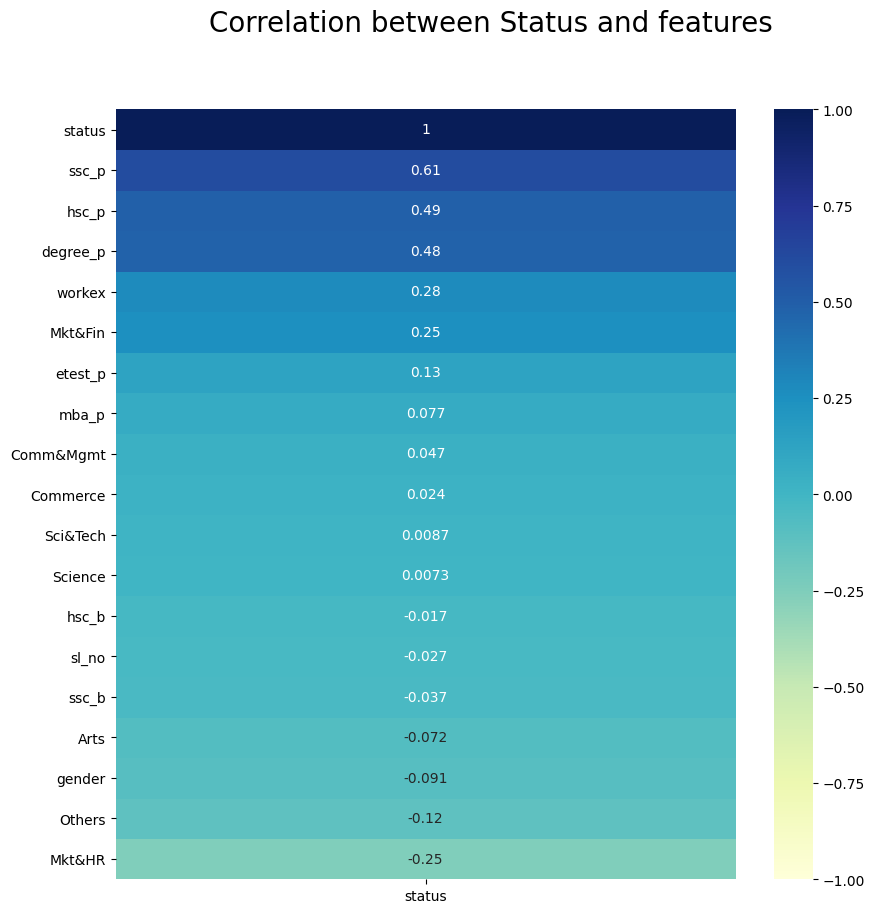

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Correlation between Status and features',fontsize=20)
ax=sns.heatmap(df.corr()[["status"]].sort_values("status"),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

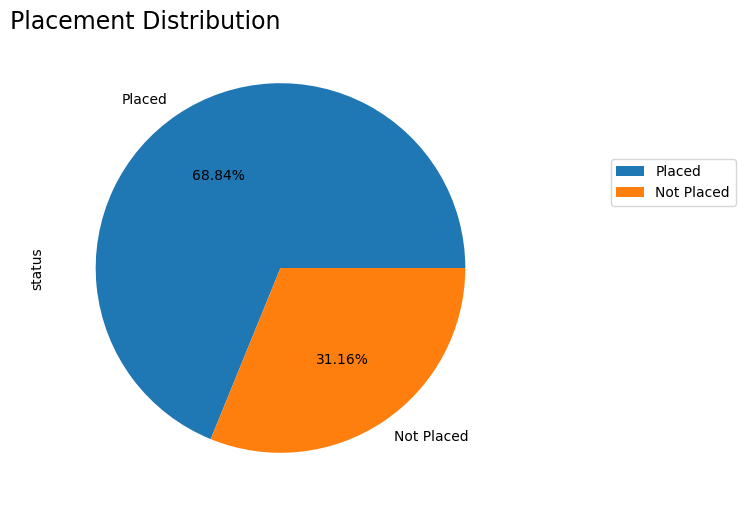

In [ ]:
df['status'].value_counts().plot.pie(autopct='%.2f%%', figsize=(8,6), labels=['Placed', 'Not Placed'])
plt.title('Placement Distribution', fontsize=17, ha='right')
plt.legend(labels=['Placed','Not Placed'], loc='best', bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.show()

From the above graph, we note that most students (68.84%) got placed.

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
df[['ssc_p','hsc_p','degree_p','etest_p','mba_p']] = StandardScaler().fit_transform(df[['ssc_p','hsc_p','degree_p','etest_p','mba_p']])

## Classification Models

### Splitting the dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['status','sl_no'],axis=1)
y = df['status']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
print(x.shape)
print(y.shape)

(215, 17)
(215,)


In [ ]:
accuracies = dict()

### Logistic regression

Accuracy is: 0.813953488372093
F1 Score:  0.8571428571428572


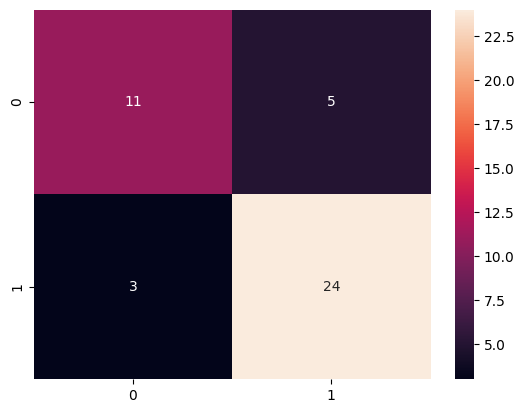

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
reg = LogisticRegression()
reg.fit(x_train, y_train)

#Make prediction
y_pred = reg.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score
accuracies['Logistic Regression (Scikit)'] = accuracy_score(y_test, y_pred)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print("F1 Score: ", f1_score(y_test, y_pred))

### Logistic Regression (Hard-coded)

In [ ]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):   
        #rand = np.random.RandomState(42)     
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

Accuracy is: 0.6511627906976745
F1 Score:  0.7457627118644067


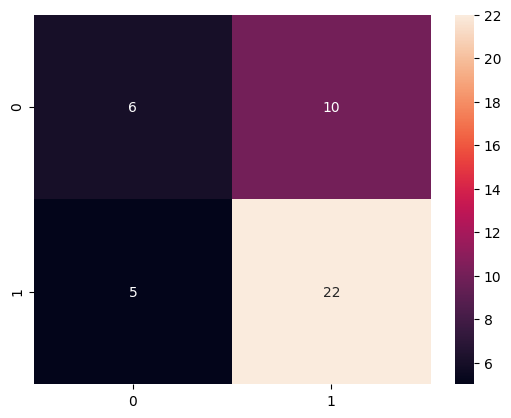

In [ ]:
from numpy import log, dot, e
from numpy.random import rand
reg = LogisticRegression()
reg.fit(x_train, y_train)

#Make prediction
y_pred = reg.predict(x_test)

from sklearn.metrics import accuracy_score
accuracies['Logistic Regression (Hard-coded)'] = accuracy_score(y_test, y_pred)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print("F1 Score: ", f1_score(y_test, y_pred))

### K Nearest Neighbours Classifier

Accuracy is: 0.7441860465116279
F1 Score:  0.819672131147541


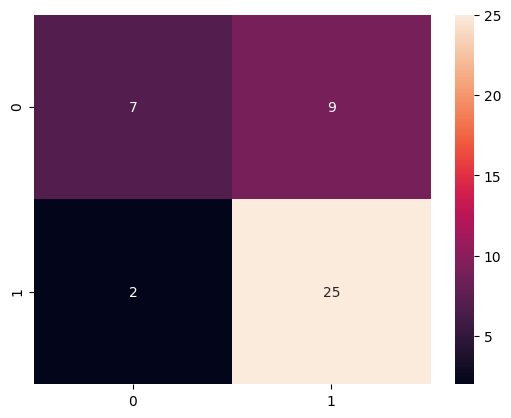

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
accuracies['KNeighbors Classifier (Scikit)'] = accuracy_score(y_test, y_pred)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print("F1 Score: ", f1_score(y_test, y_pred))

### KNN Hard-Coded

In [ ]:
def euclidean_distance(a, b):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**2
        
    distance = distance**(1/2)
    
    return distance

0.7441860465116279
F1 Score:  0.819672131147541


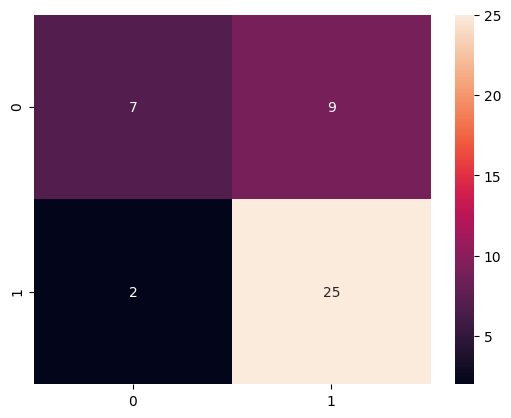

In [ ]:
def knn_predict(X_train, X_test, y_train, y_test, k):
    X_train = X_train[:].values
    X_test = X_test[:].values
    from collections import Counter
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        y_hat_test.append(prediction)
        
    return y_hat_test
y_hat_test = knn_predict(x_train, x_test, y_train, y_test, k=5)
from sklearn.metrics import accuracy_score
accuracies['KNeighbors Classifier (Hard-Coded)'] = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy_score(y_test, y_hat_test))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print("F1 Score: ", f1_score(y_test, y_pred))

### Decision Tree

Accuracy is: 0.7209302325581395
F1 Score:  0.7857142857142857


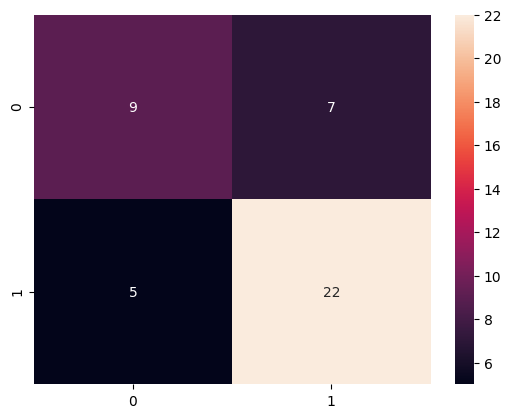

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

from sklearn.metrics import accuracy_score
accuracies['Decision Tree Classification (Scikit)'] = accuracy_score(y_test, y_pred)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print("F1 Score: ", f1_score(y_test, y_pred))

## Decision Tree Hard-coded

In [ ]:
class GadId3Classifier:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)

    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [ ]:
model = GadId3Classifier()
model.fit(x_train, y_train)

Accuracy is: 0.6046511627906976
F1 Score:  0.7857142857142857


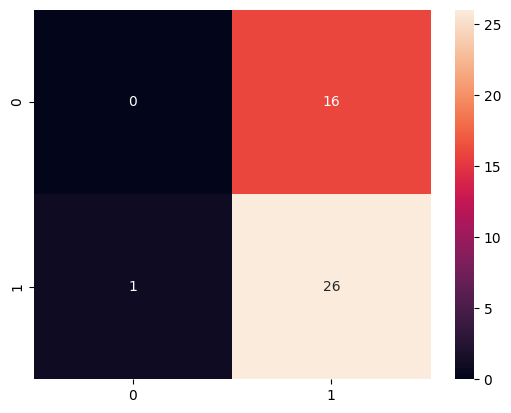

In [ ]:
y_pred_dt = model.predict(x_test)
accuracies['Decision Tree Classification (Hard-coded)'] = accuracy_score(y_test, y_pred_dt)
print('Accuracy is: '+str(accuracy_score(y_test, y_pred_dt)))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm,annot=True)
print("F1 Score: ", f1_score(y_test, y_pred))

## Results

In [ ]:
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model Name','Accuracy Score'])
accuracy_df

,Model Name,Accuracy Score
0,Logistic Regression (Scikit),0.813953
1,Logistic Regression (Hard-coded),0.651163
2,KNeighbors Classifier (Scikit),0.744186
3,KNeighbors Classifier (Hard-Coded),0.744186
4,Decision Tree Classification (Scikit),0.720930
5,Decision Tree Classification (Hard-coded),0.604651


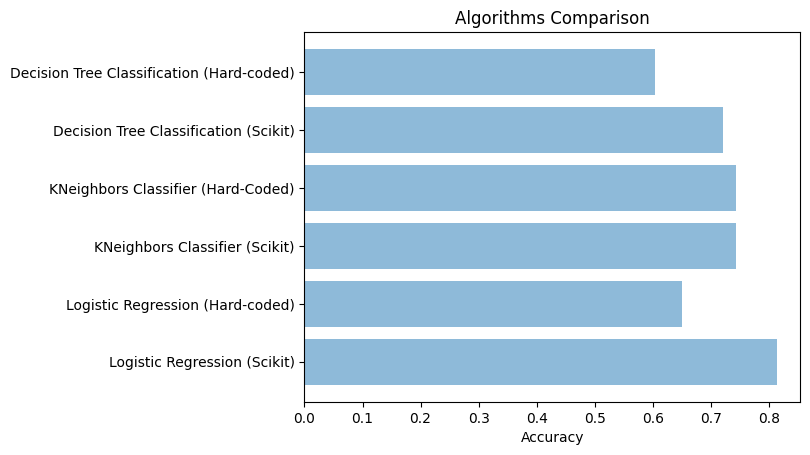

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = accuracies.keys()
y_pos = np.arange(len(objects))
performance = accuracies.values()

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Algorithms Comparison')

plt.show()

# Inference 
 - Logistic regression(Scikit-learn) works best for the dataset with an accuracy score of 81.39%
 - It also has the highest F1 Score of 85.71%
 - Decision Tree(Hard-Coded) has the lowest accuracy of 60.4%
 - We notice that ssc_p has a very strong correlation with their placement status. Those who had high percentage in SSC had got placed. This could be because the students who perform better early on are more likely to be the type of an ambitious student with a passion for learning.
 - Most people who had work experience got placed. This is expected because employers prefer those who have hands-on experience in the industry.